In [1]:
# imports

import os
import json
from dotenv import load_dotenv
from openai import OpenAI
import gradio as gr
import base64
from io import BytesIO
from PIL import Image

In [2]:
# Initialization

load_dotenv(override=True)

openai_api_key = os.getenv('OPENAI_API_KEY')
if openai_api_key:
    print(f"OpenAI API Key exists and begins {openai_api_key[:8]}")
else:
    print("OpenAI API Key not set")
    
MODEL = "gpt-4o-mini"
openai = OpenAI()

OpenAI API Key exists and begins sk-proj-


In [3]:
def artist(prompt):
    image_response = openai.images.generate(
            model="dall-e-3",
            prompt=prompt,
            size="1024x1024",
            n=1,
            response_format="b64_json",
        )
    image_base64 = image_response.data[0].b64_json
    image_data = base64.b64decode(image_base64)
    return Image.open(BytesIO(image_data))

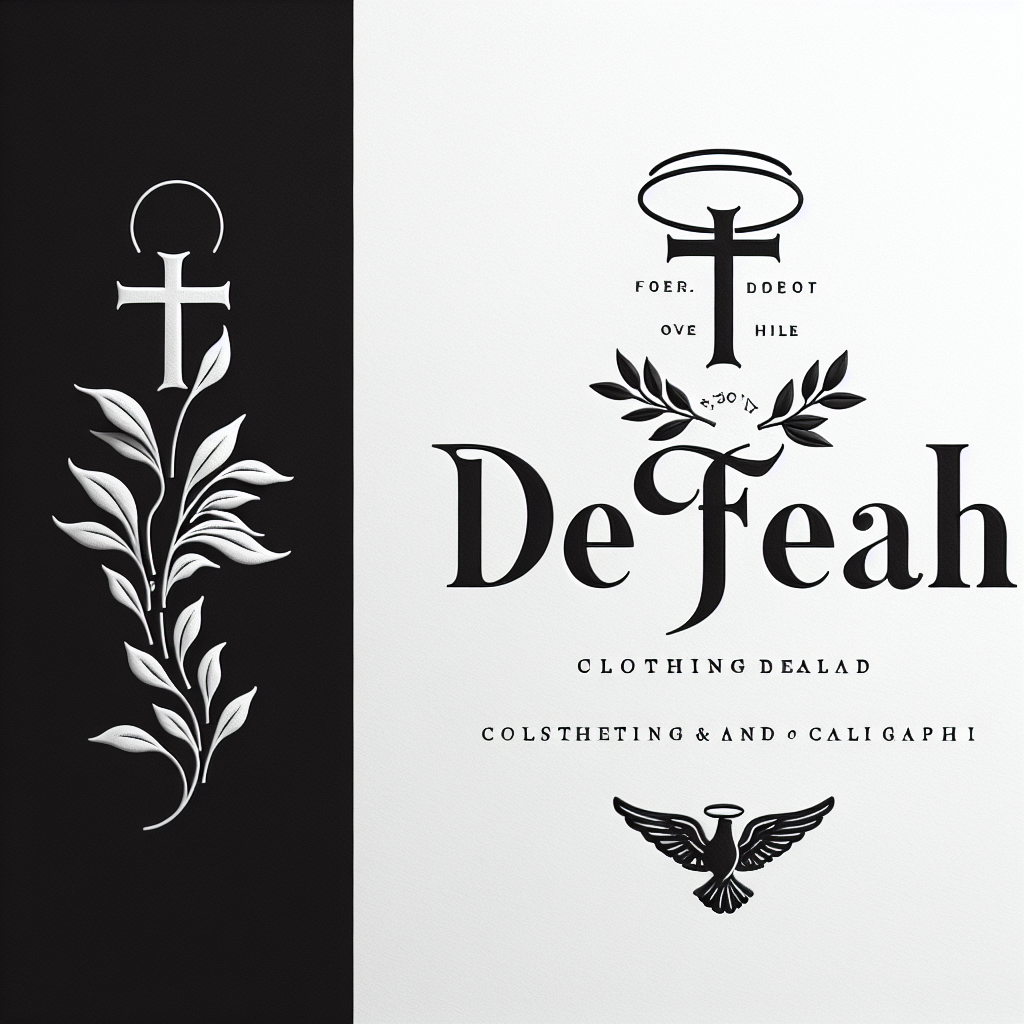

In [6]:
prompt = f"""Design a minimalist and elegant logo featuring the brand name “DEFEVA” in a refined serif or calligraphic font. The logo should use black text on a clean white background. Integrate a subtle biblical element, such as a small cross, olive branch, dove, or halo, woven naturally into or around the lettering. The overall style should feel graceful, spiritual, and luxurious, suitable for a high-end clothing and beauty brand. Keep the composition balanced, clean, and timeless."""
image = artist(prompt)
display(image)